In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import band_count

In [2]:
data_dir = "./data/"
data_fn = data_dir + "cleaned_data.txt"
data_grey_fn = data_dir + "cleaned_grey_values.txt"
all_elements = pd.read_csv(data_fn)
print(all_elements.head())

   Distance (um)  Elapsed Time   B11_ppm  Na23_ppm  Mg25_ppm  Al27_ppm  \
0      -1.483983     -1.483983 -0.000987 -1.739987  1.252779 -1.428722   
1      -1.478071     -1.478071  0.273978 -0.963147  2.358353 -1.189735   
2      -1.472164     -1.472164 -0.041514 -1.274842  1.587131 -0.879393   
3      -1.466252     -1.466252  0.646814 -0.961113  1.437627 -1.582681   
4      -1.460344     -1.460344  0.151465 -1.214546  1.474992 -1.570397   

   Si28_ppm   P31_ppm   S34_ppm  Cl35_ppm  ...  Zn66_ppm  Zn68_ppm  Sr88_ppm  \
0 -1.030042  1.095407  0.576121 -1.078462  ...  1.409131  1.572304  1.231484   
1 -0.483173  1.588047  1.585102 -1.104329  ...  1.439062  1.372410  0.979279   
2 -0.694485  1.389658  0.317097 -0.880657  ...  1.674240  1.736563  0.941318   
3 -1.052700  1.525399 -0.236500 -1.136729  ...  1.628649  1.488895 -0.189878   
4 -1.296695  1.237596 -0.067184 -1.486543  ...  1.335298  1.297910  0.958900   

   Ba138_ppm  PbTotal_ppm     pixel  new_distance  new_pixel  case  sex  


In [ ]:
grey_values = pd.read_csv(data_grey_fn)
grey_values = grey_values.iloc[::4]
print(grey_values)

      Distance_(pixels)  Gray_Value  new_pixel  case  cleaned_grey sex
0                   432    126.7965          0    43      4.842583   M
3                   435    120.0393          3    43      4.787819   M
6                   438    120.3672          6    43      4.790547   M
9                   441    116.0331          9    43      4.753875   M
12                  444    110.2875         12    43      4.703091   M
...                 ...         ...        ...   ...           ...  ..
5670               1738     95.3029       1472    56      4.557060   F
5673               1741     97.4087       1475    56      4.578916   F
5676               1744    101.0177       1478    56      4.615296   F
5679               1747    104.6929       1481    56      4.631425   F
5682               1750    101.0000       1484    56      4.615121   F

[1895 rows x 6 columns]


In [4]:
elt_name = "Sr88_ppm" # "Cu65_ppm" # "Zn66_ppm" # "Mg25_ppm" # "S34_ppm" # 
elt_array = [
    all_elements[all_elements['case']==i][elt_name] for i in [43,44,55,56]
]
print([len(arr) for arr in elt_array])

[461, 320, 570, 711]


In [5]:
grey_array = [
    grey_values[grey_values['case']==i]["Gray_Value"] for i in [43,44,55,56]
]

In [6]:
max_age = 40
mortality_rate = None # 0.1
max_corr = None # 0.99

394
(394, 38514)


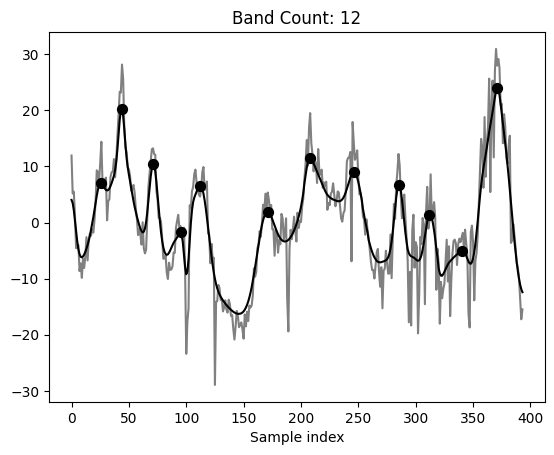

/Users/a1627293/Academic/Projects/Sharks/Software/SharkAgeEstimation/venv/lib/python3.13/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 363 iterations, i.e. alpha=5.939e-03, with an active set of 137 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/a1627293/Academic/Projects/Sharks/Software/SharkAgeEstimation/venv/lib/python3.13/site-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 363 iterations, i.e. alpha=5.939e-03, with an active set of 137 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/Users/a1627293/Academic/Projects/Sharks/Software/SharkAgeEstimation/venv/lib/python3.13/site-packages/sklearn/linear_model/_least_angle.py:723: Converg

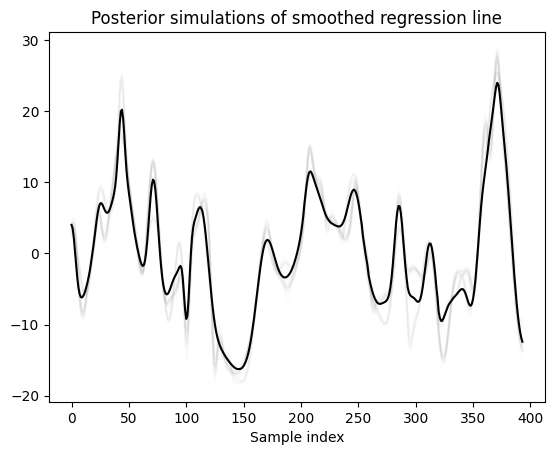

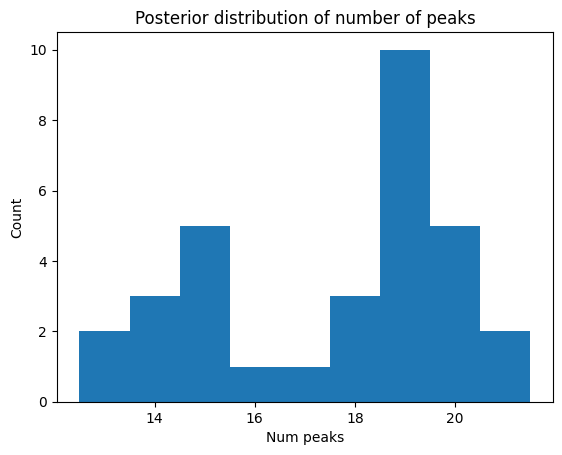

426
(426, 45050)


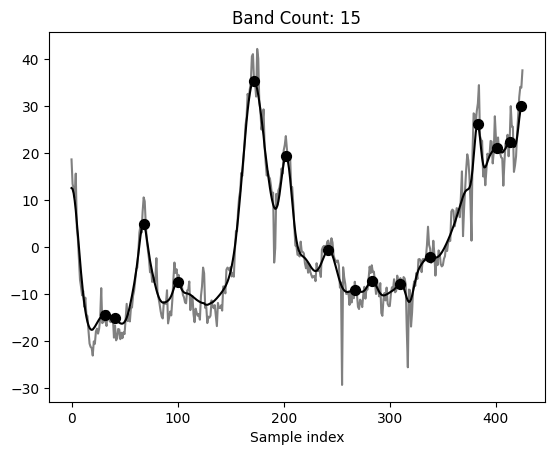

KeyboardInterrupt: 

In [7]:
for i in range(len(grey_array)):
    print(len(grey_array[i]))
    counter = band_count.BandCounter(grey_array[i], 
                                     max_bands=max_age, 
                                     mortality_rate=mortality_rate, 
                                     max_corr=max_corr,
                                     wavelets=(band_count.denoising.ricker,))
    print(counter.denoiser.dictionary.X.shape)
    # p = counter.plot(filter=False)
    # plt.show()
    p = counter.plot(filter=True)
    plt.show()
    
    n_sim = 32
    locs, counts, smootheds = counter.get_count_distribution(n_sim, True)
    plt.plot(smootheds.T, color="grey", alpha=10/1000)
    plt.plot(counter.low_freq_smoothed.smoothed, color="black")
    plt.xlabel("Sample index")
    plt.title("Posterior simulations of smoothed regression line")
    plt.show()

    plt.figure()
    plt.hist(counts, bins=np.linspace(min(counts)-0.5, max(counts)+0.5, num=max(counts)-min(counts)+2))
    plt.xlabel("Num peaks")
    plt.ylabel("Count")
    plt.title("Posterior distribution of number of peaks")
    plt.show()

(128, 3302)


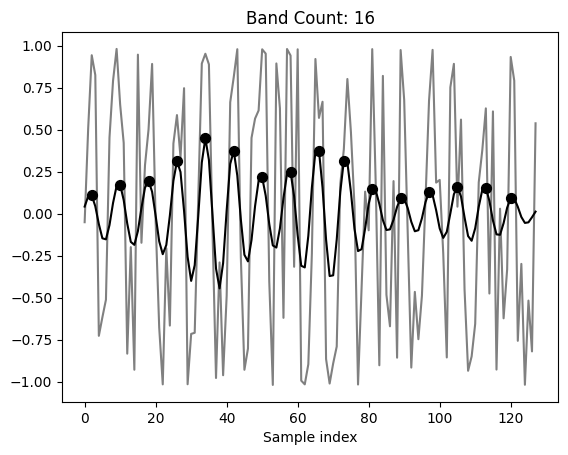

/Users/a1627293/Academic/Projects/Sharks/Software/SharkAgeEstimation/venv/lib/python3.13/site-packages/econml/sklearn_extensions/linear_model.py:730: UserWarning: Setting a suboptimal alpha can lead to miscalibrated confidence intervals. We recommend setting alpha='auto' for optimality.
  warnings.warn("Setting a suboptimal alpha can lead to miscalibrated confidence intervals. "
/Users/a1627293/Academic/Projects/Sharks/Software/SharkAgeEstimation/venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/a1627293/Academic/Projects/Sharks/Software/SharkAgeEstimation/venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mi

KeyboardInterrupt: 

In [ ]:
n=128
np.random.seed(123454)
t = np.linspace(0,16*2*np.pi, n) + np.random.normal(size=n)*1
sig = np.sin(t)

counter = band_count.BandCounter(sig, 
                                    max_bands=max_age, 
                                    mortality_rate=mortality_rate, 
                                    max_corr=max_corr,
                                    wavelets=(band_count.denoising.morlet7, ))
print(counter.denoiser.dictionary.X.shape)
# p = counter.plot(filter=False)
# plt.show()
p = counter.plot(filter=True)
plt.show()

n_sim = 30
locs, counts, smootheds = counter.get_count_distribution(n_sim, True)
plt.plot(smootheds.T[:,1::8], color="grey", alpha=10/1000)
plt.plot(counter.low_freq_smoothed.smoothed, color="black")
plt.xlabel("Sample index")
plt.title("Posterior simulations of smoothed regression line")
plt.show()

plt.figure()
plt.hist(counts, bins=np.linspace(min(counts)-0.5, max(counts)+0.5, num=max(counts)-min(counts)+2))
plt.xlabel("Num peaks")
plt.ylabel("Count")
plt.title("Posterior distribution of number of peaks")
plt.show()

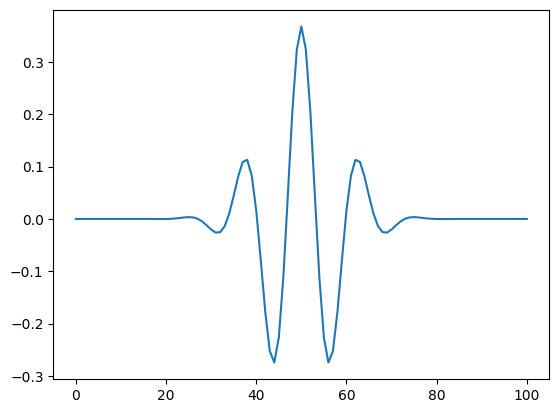

In [ ]:
plt.plot(band_count.denoising.morlet4(np.linspace(-6,6,101), 1, 0))

In [ ]:
np.dot(matrix, matrix.T)

array([[ 30,  70, 110],
       [ 70, 174, 278],
       [110, 278, 446]])

In [ ]:
print(np.dot(matrix[0], matrix[1]))

70


In [ ]:
np.max(np.dot(matrix, matrix.T), axis=1)

array([110, 278, 446])

 ...]

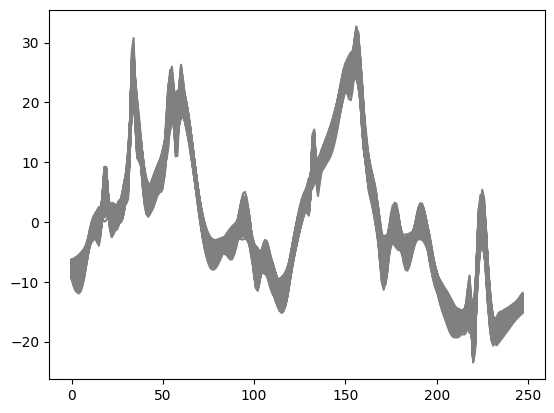

In [ ]:
plt.plot(smootheds.T, color="grey")

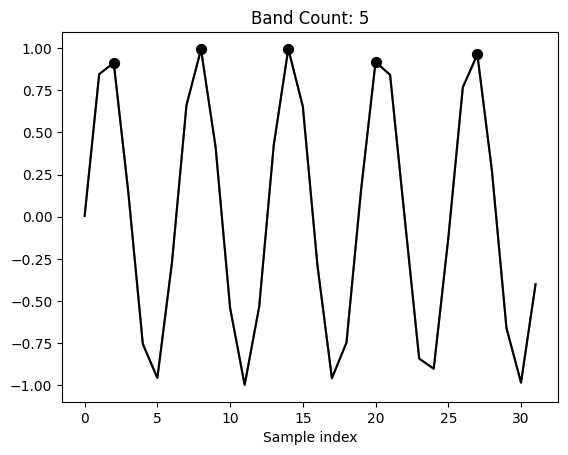

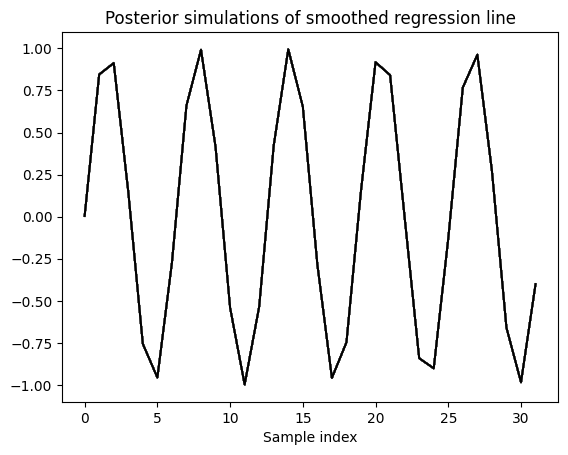

In [ ]:
counter = band_count.BandCounter(np.sin(np.arange(32)), 
                                     max_corr=max_corr,
                                     wavelets=(band_count.denoising.morlet7,))

p = counter.plot(filter=True)
plt.show()

n_sim = 2048
locs, counts, smootheds = counter.get_count_distribution(n_sim, True)
plt.plot(smootheds.T[:,1::8], color="grey", alpha=10/1000)
plt.plot(counter.low_freq_smoothed.smoothed, color="black")
plt.xlabel("Sample index")
plt.title("Posterior simulations of smoothed regression line")
plt.show()

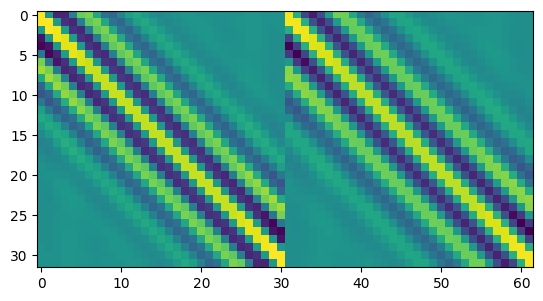

In [ ]:
plt.imshow(counter.denoiser.dictionary.X)